# Projet 3A - Classifieurs
### Bilel Ouahmed, Léo Caulier, Mathieu Delattre

## Imports et initialisation

In [36]:
import os
from google.colab import drive
drive.mount('drive')

!mkdir -p drive -v

cwd = os.getcwd()

monchemin = 'drive/My Drive/Centrale Marseille/3A/Projet 3A/dataset'

dir_path=os.path.join(cwd, monchemin)
dirs =os.listdir(dir_path)
print(dir_path)
print (dirs)

os.chdir(dir_path)

!export PYTHONPATH=$PYTHONPATH:dir_path

ModuleNotFoundError: No module named 'google.colab'

In [13]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import re
from os import listdir
from os.path import isfile, join
from numpy import asarray
import pandas as pd
import random
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [14]:
dir_path = "D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur"
os.chdir(dir_path)


## Prétraitement des images

In [ ]:
standard_size = 300

def padd_image(arr, standard_size):
  height, width = arr.shape
  arr_return = []
  for i in range(height):
    if width < standard_size:
      arr_return.append(list(arr[i])+[0]*(standard_size-width))
    else:
      arr_return.append(arr[i][:standard_size])
  if height < standard_size:
    for i in range (standard_size-height):
        arr_return.append([0]*standard_size)
  return np.array(arr_return)[:standard_size]

### Front

In [ ]:
foldername_front = os.listdir('images_front')
front_arrays = []

for filename in foldername_front:
  print(filename)
  front_arrays.append(np.asarray(Image.open(dir_path + '/images_front/' + filename).convert('L')))

padded_front_arrays = []

for i in range(len(front_arrays)):
  padded_front_arrays.append(padd_image(front_arrays[i], standard_size)/255)

front_10141582006.jpg
front_10159910075.jpg
front_10318006243.jpg
front_10374162006.jpg
front_10455822485.jpg
front_10660324.jpg
front_10700022912.jpg
front_10700708106.jpg
front_10900943598.jpg
front_109840.jpg
front_11027.jpg
front_11110001283.jpg
front_11110013927.jpg
front_11110033321.jpg
front_11110044099.jpg
front_11110044990.jpg
front_11110049599.jpg
front_11110051813.jpg
front_11110054050.jpg
front_11110064974.jpg
front_11110083227.jpg
front_11110085214.jpg
front_11110088840.jpg
front_11110089670.jpg
front_11110092830.jpg
front_11110095978.jpg
front_11110098535.jpg
front_11110100238.jpg
front_11110102447.jpg
front_11110104113.jpg
front_11110108135.jpg
front_11110114617.jpg
front_11110182302.jpg
front_11110220448.jpg
front_11110244000.jpg
front_11110492128.jpg
front_11110503039.jpg
front_11110601605.jpg
front_11110604057.jpg
front_11110610454.jpg
front_11110682529.jpg
front_11110790026.jpg
front_11110803221.jpg
front_11110812391.jpg
front_11110861627.jpg
front_11110877284.jpg
fr

### Ingrédients

In [ ]:
foldername_ingredients = os.listdir('images_ingredients')
ingredients_arrays = []

for filename in foldername_ingredients:
  ingredients_arrays.append(np.asarray(Image.open(dir_path + '/images_ingredients/' + filename).convert('L')))

padded_ingredients_arrays = []

for i in range(len(ingredients_arrays)):
  padded_ingredients_arrays.append(padd_image(ingredients_arrays[i], standard_size)/255)

### Nutrition

In [ ]:
foldername_nutrition = os.listdir('images_nutrition')
nutrition_arrays = []

for filename in foldername_nutrition:
  nutrition_arrays.append(np.asarray(Image.open(dir_path + '/images_nutrition/' + filename).convert('L')))

padded_nutrition_arrays = []

for i in range(len(nutrition_arrays)):
  padded_nutrition_arrays.append(padd_image(nutrition_arrays[i], standard_size)/255)

### Fusion

In [ ]:
X = np.concatenate((padded_front_arrays, padded_ingredients_arrays, padded_nutrition_arrays))
y = np.concatenate((np.array([[1, 0, 0]]*len(padded_front_arrays)), np.array([[0, 1, 0]]*len(padded_ingredients_arrays)), np.array([[0, 0, 1]]*len(padded_nutrition_arrays))))

In [ ]:
p = np.random.permutation(len(y))

X = X[p]
y = y[p]

In [ ]:
train_proportion = int(0.8*len(X))

X_train = X[:train_proportion]
X_test = X[train_proportion:]
y_train = y[:train_proportion]
y_test = y[train_proportion:]

## Prétraitement des images en couleur

### Front

In [10]:
foldername_front = os.listdir('images_front')
front_arrays = []

for filename in foldername_front:
  front_arrays.append(img_to_array(load_img(dir_path + '/images_front/' + filename, target_size=(224, 224))))

### Nutrition

In [11]:
foldername_nutrition = os.listdir('images_nutrition')
nutrition_arrays = []

for filename in foldername_nutrition:
  nutrition_arrays.append(img_to_array(load_img(dir_path + '/images_nutrition/' + filename, target_size=(224, 224))))

### Ingredients

In [12]:
foldername_ingredients = os.listdir('images_ingredients')
ingredients_arrays = []

for filename in foldername_ingredients:
    ingredients_arrays.append(img_to_array(load_img(dir_path + '/images_ingredients/' + filename, target_size=(224, 224))))

### Fusion

In [13]:
X = np.concatenate((front_arrays, ingredients_arrays, nutrition_arrays))
y = np.concatenate((np.array([[1, 0, 0]]*len(front_arrays)), np.array([[0, 1, 0]]*len(ingredients_arrays)), np.array([[0, 0, 1]]*len(front_arrays))))

In [14]:
p = np.random.permutation(len(y))

X = X[p]
y = y[p]

In [15]:
with open('array_entree_224.npy', 'wb') as f:
    np.save(f, X)

with open('array_sortie_224.npy', 'wb') as f:
    np.save(f, y)

## One vs Rest : Front

In [6]:
!pip install tensorflow

  Using cached tensorflow-2.12.0rc1-cp311-cp311-win_amd64.whl (2.0 kB)
  Using cached tensorflow_intel-2.12.0rc1-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.6-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.12.0rc1-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.callbacks import ModelCheckpoint

In [21]:
X_train[0].shape

(300, 300)

In [17]:
model_front = Sequential()

model_front.add(Conv2D(16, kernel_size=(6,6), strides=(1,1), padding='same', activation='relu', input_shape=(standard_size, standard_size, 1)))
model_front.add(MaxPooling2D((4,4)))
# model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# model.add(MaxPooling2D((2,2)))
model_front.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_front.add(MaxPooling2D((4,4)))
model_front.add(Flatten())
model_front.add(Dense(64))
model_front.add(Dropout(0.2))
model_front.add(Dense(16))
model_front.add(Dense(1, activation='sigmoid'))

#model_front.compile(optimizer='adam',loss = 'BinaryCrossentropy()', metrics=['accuracy'])
model_front.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

print(model_front.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 300, 300, 16)      592       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10368)             0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [18]:
checkpoint = ModelCheckpoint(dir_path + '/models/callback_checkpoint/model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model_front.fit(X_train, y_train[:, 0], batch_size=128, epochs=15, validation_split=0.1, callbacks=[checkpoint], verbose=1)

Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.6635
Epoch 1: val_accuracy improved from -inf to 0.67789, saving model to D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models/callback_checkpoint\model.h5
34/34 [==============================] - 84s 2s/step - loss: 0.3293 - accuracy: 0.6635 - val_loss: 0.3220 - val_accuracy: 0.6779
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.6663
Epoch 2: val_accuracy improved from 0.67789 to 0.72211, saving model to D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models/callback_checkpoint\model.h5
34/34 [==============================] - 104s 3s/step - loss: 0.2816 - accuracy: 0.6663 - val_loss: 0.1821 - val_accuracy: 0.7221
Epoch 3/15
34/34 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.7979
Epoch 3: val_accuracy improved from 0.72211 to 0.83789, saving model to D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/mod

In [19]:
score = model_front.evaluate(X_test, y_test[:, 0], verbose=0)
print("Score : ", score)

Score :  [0.06353957951068878, 0.9149115681648254]


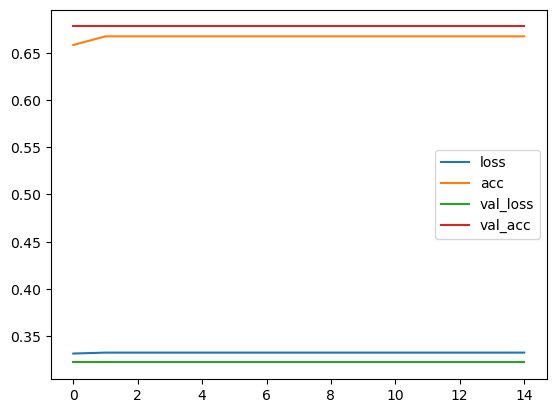

In [16]:
plt.figure(1)
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_loss'], label="val_loss")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.legend()
plt.show()

In [20]:
model_front.save(dir_path + '/models/front')

INFO:tensorflow:Assets written to: D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models/front\assets


INFO:tensorflow:Assets written to: D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models/front\assets


In [ ]:
model_front = load_model(dir_path + '/models/front')

In [ ]:
model_front.predict(X_test[:1])

1/1 [==============================] - 0s 132ms/step


array([[0.07963336]], dtype=float32)

## One VS Rest : Front Couleurs

In [17]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [15]:
with open('array_entree_224.npy', 'rb') as f:
    X = np.load(f)

with open('array_sortie_224.npy', 'rb') as f:
    y = np.load(f)
    
train_proportion = int(0.8*len(X))

X_train = X[:train_proportion]
X_test = X[train_proportion:]
y_train = y[:train_proportion]
y_test = y[train_proportion:]

In [5]:
def plot_learning_curves(history):
    #print history.history.keys()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [49]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\leoca\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
checkpoint = ModelCheckpoint(dir_path + '/models/callback_checkpoint/model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

h = classifier.fit(X_train, y_train[:, 0], batch_size=32, epochs=5,callbacks=[checkpoint], validation_split=0.1, verbose=1)

Epoch 1/5
129/129 [==============================] - ETA: 0s - loss: 1.4254 - accuracy: 0.7296
Epoch 1: val_accuracy improved from -inf to 0.83442, saving model to D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models/callback_checkpoint\model.h5
129/129 [==============================] - 1212s 9s/step - loss: 1.4254 - accuracy: 0.7296 - val_loss: 0.3624 - val_accuracy: 0.8344
Epoch 2/5
129/129 [==============================] - ETA: 0s - loss: 0.3132 - accuracy: 0.8727
Epoch 2: val_accuracy improved from 0.83442 to 0.85185, saving model to D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models/callback_checkpoint\model.h5
129/129 [==============================] - 1241s 10s/step - loss: 0.3132 - accuracy: 0.8727 - val_loss: 0.3371 - val_accuracy: 0.8519
Epoch 3/5
129/129 [==============================] - ETA: 0s - loss: 0.2703 - accuracy: 0.8967
Epoch 3: val_accuracy improved from 0.85185 to 0.90632, saving model to D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_

In [6]:
classifier = Sequential()

classifier.add(Conv2D(64, (3, 3), input_shape=(256, 256, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=2))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=2))
classifier.add(Conv2D(256, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=2))

classifier.add(Conv2D(512, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=2))
classifier.add(Conv2D(512, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=2))

classifier.add(Flatten())
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\leoca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
classifier.save(dir_path + '/models/VGG16_256_32_10_01')

INFO:tensorflow:Assets written to: D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models/VGG16_224_32_10_01\assets


INFO:tensorflow:Assets written to: D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models/VGG16_224_32_10_01\assets


In [8]:
score = classifier.evaluate(X_test, y_test[:, 0], verbose=0)
print("Score : ", score)

Score :  [0.20711304247379303, 0.9293193817138672]


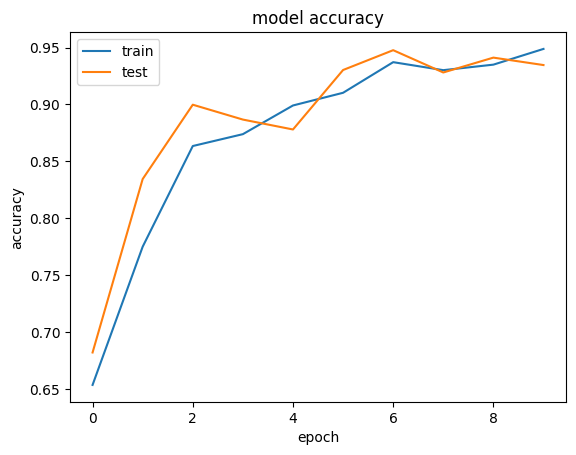

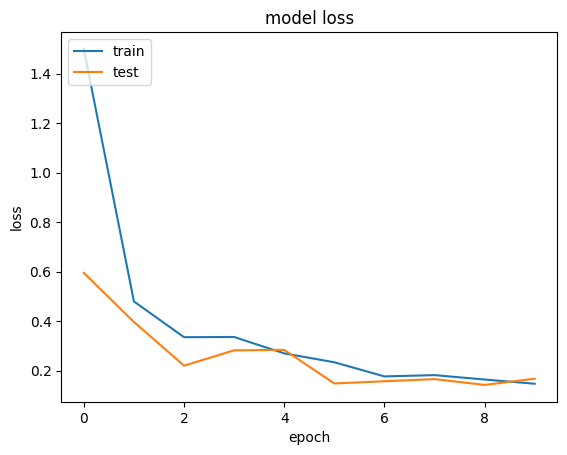

In [10]:
plot_learning_curves(h)

In [6]:
model_couleur = Sequential()

model_couleur.add(Conv2D(16, kernel_size=(6,6), strides=(1,1), padding='same', activation='relu', input_shape=(300, 300, 3)))
model_couleur.add(MaxPooling2D((4,4)))
# model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# model.add(MaxPooling2D((2,2)))
model_couleur.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_couleur.add(MaxPooling2D((4,4)))
model_couleur.add(Flatten())
model_couleur.add(Dense(64))
model_couleur.add(Dropout(0.2))
model_couleur.add(Dense(16))
model_couleur.add(Dense(1, activation='sigmoid'))

#model_couleur.compile(optimizer='adam',loss = 'BinaryCrossentropy()', metrics=['accuracy'])
model_couleur.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

print(model_couleur.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 64)                6

In [7]:
checkpoint = ModelCheckpoint(dir_path + '/models_couleurs/callback_checkpoint/model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model_couleur.fit(X_train, y_train[:, 0], batch_size=256, epochs=15, validation_split=0.1, callbacks=[checkpoint], verbose=1)

Epoch 1/15
17/17 [==============================] - ETA: 0s - loss: 0.3436 - accuracy: 0.6564
Epoch 1: val_accuracy improved from -inf to 0.64842, saving model to D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/models_couleurs/callback_checkpoint\model.h5
17/17 [==============================] - 178s 9s/step - loss: 0.3436 - accuracy: 0.6564 - val_loss: 0.3516 - val_accuracy: 0.6484
Epoch 2/15
17/17 [==============================] - ETA: 0s - loss: 0.3258 - accuracy: 0.6742
Epoch 2: val_accuracy did not improve from 0.64842
17/17 [==============================] - 138s 8s/step - loss: 0.3258 - accuracy: 0.6742 - val_loss: 0.3516 - val_accuracy: 0.6484
Epoch 3/15
17/17 [==============================] - ETA: 0s - loss: 0.3258 - accuracy: 0.6742
Epoch 3: val_accuracy did not improve from 0.64842
17/17 [==============================] - 138s 8s/step - loss: 0.3258 - accuracy: 0.6742 - val_loss: 0.3516 - val_accuracy: 0.6484
Epoch 4/15
17/17 [==============================] - ETA

In [9]:
score = model_couleur.evaluate(X_test, y_test[:, 0], verbose=0)
print("Score : ", score)

Score :  [0.3381113111972809, 0.6618887186050415]


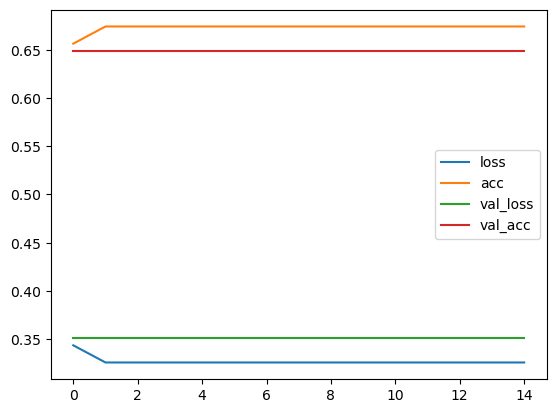

In [10]:
plt.figure(1)
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['accuracy'], label="acc")
plt.plot(history.history['val_loss'], label="val_loss")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.legend()
plt.show()

## Ingrédients vs Nutrition

In [ ]:
!pip install ftfy regex tqdm
!pip install torch
!pip install git+https://github.com/openai/CLIP.git

In [8]:
import numpy as np
import torch
import clip
from PIL import Image
from os import listdir
from os.path import isfile, join
from tqdm import tqdm

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open("./Dataset_couleur/images_ingredients/ingredients_133.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(["ingredients", "nutrition"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]
print(y_test[0, 1:])

Label probs: [[0.8725814  0.12741852]]


NameError: name 'y_test' is not defined

In [107]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("RN50x16", device=device)

def ingredients_or_nutrition(img_to_process):

  img = preprocess(Image.fromarray((img_to_process).astype('uint8'))).unsqueeze(0).to(device)
  text = clip.tokenize(["ingredient", "nutritional value"]).to(device)

  with torch.no_grad():
      image_features = model.encode_image(img)
      text_features = model.encode_text(text)
      
      logits_per_image, logits_per_text = model(img, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()
  
  return np.argmax(probs) + 1

## Nutrition VS Ingredients

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

In [51]:

dir_path = "D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/images_nutrition"
os.chdir(dir_path)

### Understanding of CLIP model

In [62]:
import clip
import numpy as np
import os
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image

from collections import OrderedDict
import torch

clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [102]:
model, preprocess = clip.load("RN50x64")
#model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

descriptions = {
    "ingredients": "a photo of ingredients",
    "nutrition": "a photo of nutritional values",
}

100%|█████████████████████████████████████| 1.26G/1.26G [01:18<00:00, 17.1MiB/s]


Model parameters: 623,258,305
Input resolution: 448
Context length: 77
Vocab size: 49408


<PIL.Image.Image image mode=RGB size=400x184 at 0x25C67E33190>
<PIL.Image.Image image mode=RGB size=400x330 at 0x25C67E73D10>


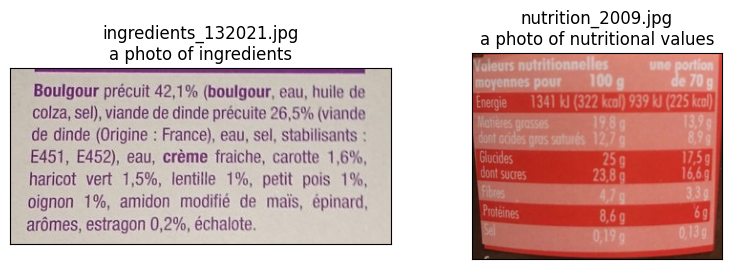

In [103]:
original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

for filename in [filename for filename in ["ingredients_132021.jpg","nutrition_2009.jpg"]]:
    name = os.path.splitext(filename)[0]

    if name[:11]=='ingredients':
        dir_path = "D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/images_ingredients"
        os.chdir(dir_path)
        name=name[:11]
    if name[:9]=='nutrition':
        dir_path = "D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/images_nutrition"
        os.chdir(dir_path)
        name=name[:9]

    image = Image.open(filename).convert("RGB")
    print(image)
  
    plt.subplot(2, 4, len(images) + 1)
    plt.imshow(image)
    plt.title(f"{filename}\n{descriptions[name]}")
    plt.xticks([])
    plt.yticks([])

    original_images.append(image)
    images.append(preprocess(image))
    texts.append(descriptions[name])

plt.tight_layout()

In [104]:
image_input = torch.tensor(np.stack(images))
text_tokens = clip.tokenize(["This is " + desc for desc in texts])

In [105]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = np.dot(text_features,image_features.T)

Text(0.5, 1.0, 'Cosine similarity between text and image features')

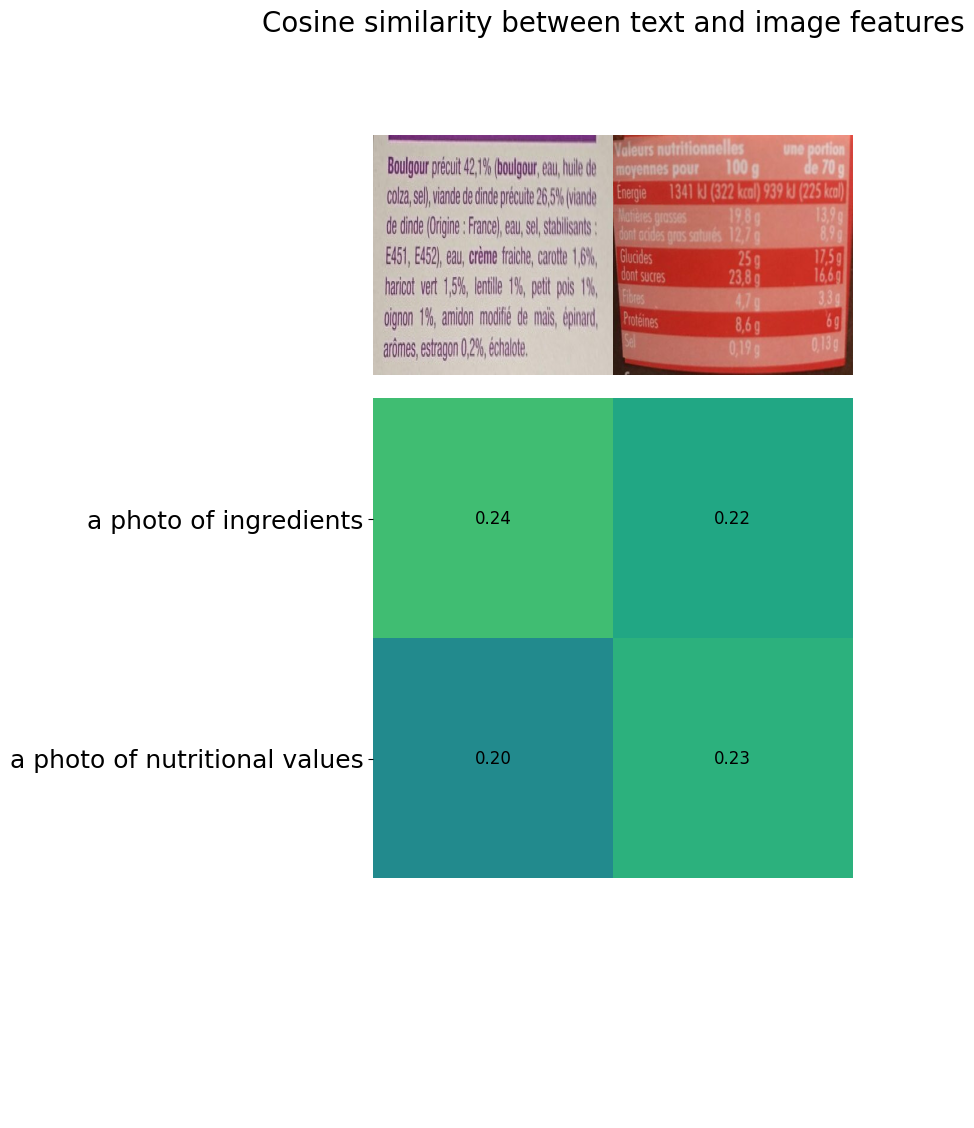

In [106]:
count = len(descriptions)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)

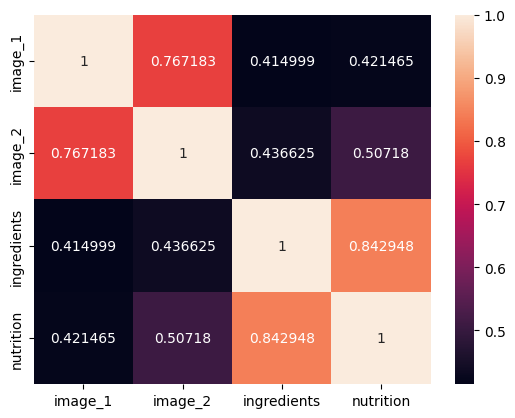

In [61]:
import seaborn as sns

cov = np.corrcoef(image_features, text_features)
labs = ['image_1', 'image_2', 'ingredients','nutrition']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [14]:
logits_per_image, logits_per_text = model(image_input, text_tokens)
probs = logits_per_image.softmax(dim=-1)
print(probs)

tensor([[0.5100, 0.4900],
        [0.1958, 0.8042]], grad_fn=<SoftmaxBackward0>)


### Training of CLIP

In [50]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import clip

# Définir les descriptions des classes
class_descriptions = {
    "ingredients": "a photo of ingredients on food products",
    "nutrition": "a photo of nutritional values on food products",
}

# Définir le chemin vers le dossier contenant les images
data_dir = "D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur/images"

# Définir la taille des images à utiliser
image_size = 224

# Créer les transformations d'imageq

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor()
])

# Charger les données
dataset = datasets.ImageFolder(data_dir, transform=transform)
train_data, val_data = torch.utils.data.random_split(dataset, [0.8, 0.2])

# Charger le modèle CLIP
model, preprocess = clip.load('ViT-B/32', device='cpu')

# Définir les noms de classes
class_names = dataset.classes

# Définir les paramètres d'entraînement
num_epochs = 5
batch_size = 32
learning_rate = 0.001

# Définir l'optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Entraîner le modèle
for epoch in range(num_epochs):
    train_loss = 0.0
    for images, labels in DataLoader(train_data, batch_size=batch_size, shuffle=True):
        # Calculer les prédictions du modèle
        features = model.encode_image(images)

        # Calculer la perte et effectuer la rétropropagation
        loss = torch.nn.functional.cross_entropy(features, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Mettre à jour la perte d'entraînement
        train_loss += loss.item() * images.size(0)

    # Afficher la perte d'entraînement
    print(f"Epoch {epoch+1}, train loss: {train_loss/len(train_data)}")

Epoch 1, train loss: 0.981867908320217


KeyboardInterrupt: 

In [45]:
# Évaluer le modèle sur l'ensemble de validation
val_loss = 0.0
val_correct = 0
with torch.no_grad():
    for images, labels in DataLoader(val_data, batch_size=batch_size):
        # Convertir les images en tenseurs et les prétraiter pour le modèle CLIP
        #images = preprocess(images).to('cpu')

        # Calculer les prédictions du modèle
        features = model.encode_image(images)
        predictions = torch.argmax(features, dim=1)

        # Calculer la perte et le nombre de prédictions correctes
        loss = torch.nn.functional.cross_entropy(features, labels)
        val_loss += loss.item() * images.size(0)
        val_correct += (predictions == labels).sum().item()

# Afficher les résultats de l'évaluation
print(f"Validation loss: {val_loss/len(val_data)}, accuracy: {val_correct/len(val_data)}")

Validation loss: 0.705091495513916, accuracy: 0.48


## Model performances

In [112]:
from keras.models import load_model
import numpy as np

dir_path = "D:/Users/leoca/Documents/Cours/Projet_3A/Dataset_couleur"
os.chdir(dir_path)

model_front = load_model(dir_path + '/models/VGG16_224_32_10_01')

In [113]:
with open('array_entree_224.npy', 'rb') as f:
    X = np.load(f)

with open('array_sortie_224.npy', 'rb') as f:
    y = np.load(f)
    
train_proportion = int(0.8*len(X))

X_train = X[:train_proportion]
X_test = X[train_proportion:]
y_train = y[:train_proportion]
y_test = y[train_proportion:]

In [114]:
errors = 0

for i in range(len(X_test)):
  img_to_process = X_test[i]
  is_front = model_front.predict(X_test[i:i+1])
  if is_front < 0.5:
    class_predicted = np.eye(3)[ingredients_or_nutrition(img_to_process)]
  else:
    class_predicted = np.eye(3)[0]
  if (class_predicted == y_test[i]).all():
    pass
  else:
    errors += 1
    print("Erreur rencontrée (" + str(errors) + "/" + str(i) + ") ------- Classe prédite : " + str(class_predicted.astype(int)) + " / Vraie classe : " + str(y_test[i]))

1/1 [==============================] - 0s 81ms/step
Erreur rencontrée (1/22) ------- Classe prédite : [1 0 0] / Vraie classe : [0 0 1]
1/1 [==============================] - 0s 103ms/step
Erreur rencontrée (2/27) ------- Classe prédite : [1 0 0] / Vraie classe : [0 1 0]
1/1 [==============================] - 0s 92ms/step
Erreur rencontrée (3/35) ------- Classe prédite : [0 0 1] / Vraie classe : [0 1 0]
1/1 [==============================] - 0s 88ms/step
Erreur rencontrée (4/38) ------- Classe prédite : [0 0 1] / Vraie classe : [0 1 0]
1/1 [==============================] - 0s 84ms/step
Erreur rencontrée (5/52) ------- Classe prédite : [1 0 0] / Vraie classe : [0 1 0]
1/1 [==============================] - 0s 83ms/step
Erreur rencontrée (6/53) ------- Classe prédite : [0 0 1] / Vraie classe : [0 1 0]
1/1 [==============================] - 0s 80ms/step
Erreur rencontrée (7/61) ------- Classe prédite : [1 0 0] / Vraie classe : [0 1 0]
1/1 [==============================] - 0s 93ms/step
Er

In [115]:
print('Accuracy : ' + str(100*(len(X_test)-errors)/len(X_test)))

Accuracy : 90.40139616055846
